### Data can be about
!) Text
2) Audio
3) Video
4) Images
5) DNA
6) Excel


1) Get data into a numerical representation
2) Build a machine learning model

We'll use a linear regression formula to make a straight line with known parameters

In [118]:
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 9.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 6.7 MB/s eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.9 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


### creating a linear regression pytorch class

In [1]:
import torch
import torch.nn as nn

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True,dtype=torch.float32))
    def forward(self,x: torch.Tensor):
        return self.weights*x+self.bias
    

### Checking out model parameters

In [3]:
torch.manual_seed(42)
model0 = LinearRegressionModel()

In [24]:
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [5]:
list(model0.state_dict())

['weights', 'bias']

### Making predictions using torch.inference_mode()

### Inference mode prevents python from keeping track of gradients. It means less data to keep track of
### helps, make the code run faster. Same as torch.no_grad() but inference_mode is newer

In [6]:
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
# y = torch.arange(0,1,0.01)

In [7]:
len(X)
X_train = X[:30]
X_test = X[31:]

In [8]:
with torch.inference_mode():
    y = model0.forward(X)

In [9]:
y
y_train = y[:30]
y_test = y[31:]

In [10]:
weights=0.7
bias = 0.3
y = weights*X+bias

In [11]:
y

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

### Training a model is to move from some unknown parameters to some known parameters
### Use loss functions for this
### Loss function is also cost function or criterion
### measures how wrong the measurements are compared to real val
### Optimizers: Takes into account the loss and adjusts the weights and biases to make them better

In [20]:
# setup a loss function
loss_fn = nn.L1Loss()

In [21]:
loss_fn

L1Loss()

In [22]:
optimizer = torch.optim.SGD(model0.parameters(),lr=0.01) #lr=learning_rate is the most important hyperparameter

### building a training and testing loop in pytorch
A couple of things that are needed
1. Loop through the data
2. Forward pass (data moving through the model forward)
3. Optimizer zero grad
4. Backwards - move backwards through the network to calculate gradients of each of the parameters of the model wrt the loss
5. Optimizer step - Use the optimizer to adjust the model parameters to try and improve the loss (gradient descent) 

In [25]:
#epochs
epochs = 100 #epoch is one loop through the data
epoch_count = []
loss_track = []
test_loss_track = []
for epoch in range(epochs):
    model0.train() #train mode requires all parameters that require gradients to require gradients
    # forward pass
    y_pred = model0(X_train)
    #Calculate the loss for the predictions
    loss = loss_fn(y_pred,y_train)
    print("Loss is ",loss)
    #set optimizer zero_grad
    optimizer.zero_grad()
    #perform back propagation on the loss
    loss.backward()
    #take the gradient step
    optimizer.step() #by default, how the optimizer changes will accumulate through the loop so we have to zero them above in step 3
    model0.eval() #turns off different settings for evaluation
    #in training, you do model0.train(), in evaluation call model0.eval()
    with torch.inference_mode(): #turns off gradient tracking, does the same as torch.no_grad() but faster
        # do the forward pass, 
        test_preds = model0(X_test)
        loss_test = loss_fn(test_preds,y_test)
    if epoch%10==0:
        epoch_count.append(epoch)
        loss_track.append(loss.detach().numpy())
        test_loss_track.append(loss_test.detach().numpy())
        print(f"Epoch: {epoch}, loss: {loss}, test_loss: {loss_test}") 

Loss is  tensor(0., grad_fn=<MeanBackward0>)
Epoch: 0, loss: 0.0, test_loss: 0.0
Loss is  tensor(0., grad_fn=<MeanBackward0>)
Loss is  tensor(0., grad_fn=<MeanBackward0>)
Loss is  tensor(0., grad_fn=<MeanBackward0>)
Loss is  tensor(0., grad_fn=<MeanBackward0>)
Loss is  tensor(0., grad_fn=<MeanBackward0>)
Loss is  tensor(0., grad_fn=<MeanBackward0>)
Loss is  tensor(0., grad_fn=<MeanBackward0>)
Loss is  tensor(0., grad_fn=<MeanBackward0>)
Loss is  tensor(0., grad_fn=<MeanBackward0>)
Loss is  tensor(0., grad_fn=<MeanBackward0>)
Epoch: 10, loss: 0.0, test_loss: 0.0
Loss is  tensor(0., grad_fn=<MeanBackward0>)
Loss is  tensor(0., grad_fn=<MeanBackward0>)
Loss is  tensor(0., grad_fn=<MeanBackward0>)
Loss is  tensor(0., grad_fn=<MeanBackward0>)
Loss is  tensor(0., grad_fn=<MeanBackward0>)
Loss is  tensor(0., grad_fn=<MeanBackward0>)
Loss is  tensor(0., grad_fn=<MeanBackward0>)
Loss is  tensor(0., grad_fn=<MeanBackward0>)
Loss is  tensor(0., grad_fn=<MeanBackward0>)
Loss is  tensor(0., grad_fn

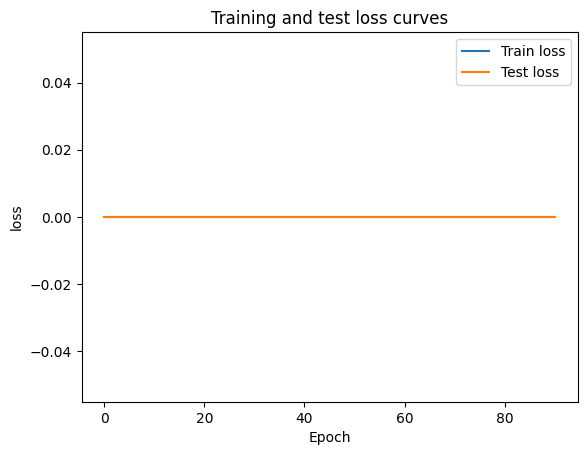

In [17]:
import matplotlib.pyplot as plt
plt.plot(epoch_count,loss_track,label="Train loss")
plt.plot(epoch_count,test_loss_track,label="Test loss")
# plt.title("Test loss curve")
plt.title("Training and test loss curves")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend()

Text(0.5, 1.0, 'Test loss curve')

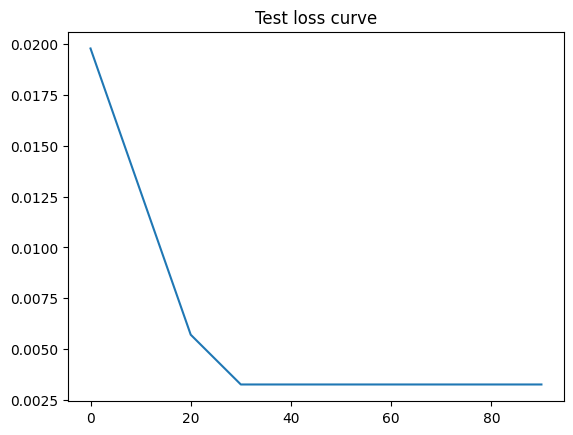

In [49]:
model0.state_dict()

OrderedDict([('weights', tensor([0.6573])), ('bias', tensor([0.3128]))])

In [50]:
model0.eval()
list(model0.parameters())

[Parameter containing:
 tensor([0.6573], requires_grad=True),
 Parameter containing:
 tensor([0.3128], requires_grad=True)]

In [51]:
with torch.no_grad():
    print(list(model0.parameters()))

[Parameter containing:
tensor([0.6573], requires_grad=True), Parameter containing:
tensor([0.3128], requires_grad=True)]


### Saving and loading models in pytorch

1) torch.save - save a model in python pickle format
2) torch.load - load a saved pytorch object
3) torch.nn.module.load_state_dict - allows to load a model's saved state dict

Pytorch save and load: https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [52]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(MODEL_SAVE_PATH)

models/01_pytorch_workflow_model_0.pth


In [53]:
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(model0.state_dict(),MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [56]:
load_model = LinearRegressionModel()
load_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
load_model.eval()

LinearRegressionModel()

In [63]:
with torch.inference_mode():
    loaded_model_preds = load_model(X_test)

In [64]:
# y_pred ==loaded_model_preds
model0.eval()
with torch.inference_mode():
    y_preds = model0(X_test)

In [65]:
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Putting it all together

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
torch.__version__

'2.0.1'

In [40]:
torch.backends.mps.is_available()

if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device=torch.device("cpu")


In [41]:
torch.backends.mps.is_built()

True

### Create data using the linear regression formula

In [7]:
import matplotlib.pyplot as plt

In [6]:
weight=0.7
bias = 0.3

In [5]:
start = 0
stop = 1
step = 0.02
X = torch.arange(start,stop,step).unsqueeze(dim=1)

In [8]:
X.shape

torch.Size([50, 1])

In [9]:
y = weight*X + bias

In [10]:
y

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [11]:
train_split = int(0.8*len(X))

In [12]:
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

In [13]:
len(X_train)

40

In [37]:
len(y_test)

10

In [15]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test,predictions=None):
    plt.figure(figsize=(10,8))
    plt.scatter(train_data,train_labels,s=4,c="b",label="Training data")
    plt.scatter(test_data,test_labels,s=4,c="g",label="Testing data")
    if predictions is not None:
        plt.scatter(test_data,predictions,s=4,c="r",label="Predictions")
    plt.legend(prop={'size':14})
    

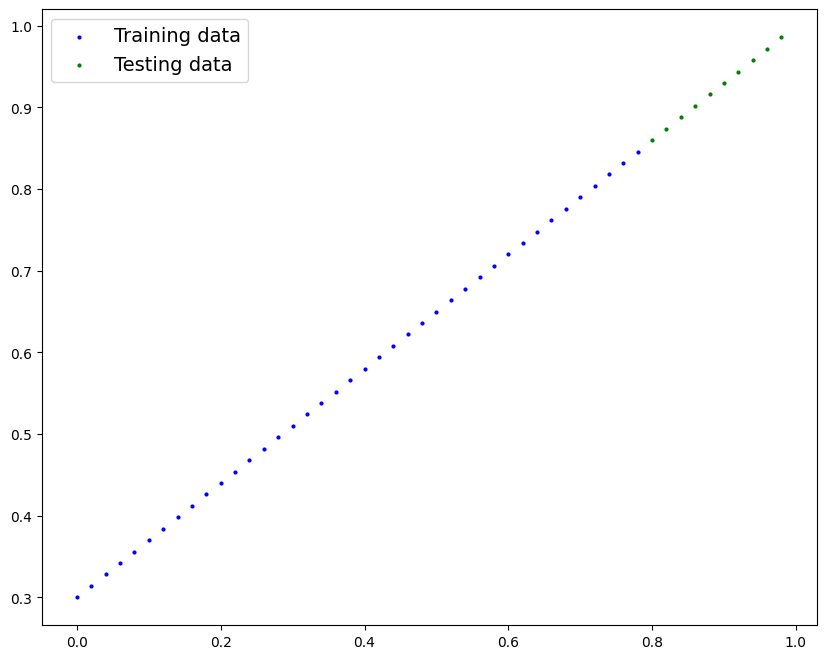

In [16]:
plot_predictions(X_train,y_train,X_test,y_test,None)

### 2) Building a linear model

In [17]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        #use nn.linear for creating model parameters / linear layer/ linear transform
        self.linear_layer = nn.Linear(in_features=1,out_features=1)
    def forward(self,x: torch.Tensor)->torch.Tensor:
        return self.linear_layer(X)

In [18]:
torch.manual_seed(42)
model = LinearRegressionModel()

In [19]:
model, model.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [42]:
# set the model to use a target device
next(model.parameters()).device

device(type='cpu')

In [43]:
model.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [44]:
next(model.parameters()).device

device(type='mps', index=0)

In [39]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

### Training
We need:
1) Loss function
2) Optimizer
3) Training Loop
4) Testing loop

In [24]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model.parameters(),lr=0.01)

In [35]:
# device="cpu"

In [46]:
torch.manual_seed(42)

epochs = 1000

#put data on the same device
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model.train()
    print(next(model.parameters()).device)
    # forward pass - do a forward pass to get the predictions
    X_train = X_train.to(device)
    model = model.to(device)
    print(X_train)
    y_pred = model(X_train)
    #calculate the loss calculate loss bw predicted and actual values
    loss = loss_fn(y_train,y_pred)
    #optimizer zero grad - make the gradient zero
    optimizer.zero_grad()
    #perform backpropagation - backpropagate the loss
    loss.backward()
    #optimize the parameters using the optimizer declared above
    optimizer.step()
    #testing
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test).to(device)
        test_loss = loss_fn(test_pred,y_test)
    #print what's happening
    if epoch%10==0:
        print(f'Epoch is {epoch}')
        print(f'Test loss is {test_loss}')
        print(f'Train loss is {train_loss}')


mps:0
tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800]], device='mps:0')


RuntimeError: Placeholder storage has not been allocated on MPS device!

In [42]:
X_train

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800], device='mps:0')

In [45]:
device

device(type='mps')

In [47]:
torch.cuda.is_available()

False